# Quickstart with CatBoost 🚀🐈 - Multinomial Classifier
## Install all the things

In [1]:
!pip3 install graphviz
!pip3 install ipywidgets
!pip3 install shap
!pip3 install seaborn

  Using cached graphviz-0.16-py2.py3-none-any.whl (19 kB)
You should consider upgrading via the '/Users/Shared/Dev/learning-stuff/ml/env/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 121 kB 761 kB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 243 kB 2.2 MB/s eta 0:00:01
You should consider upgrading via the '/Users/Shared/Dev/learning-stuff/ml/env/bin/python3 -m pip install --upgrade pip' command.
Processing /Users/sk/Library/Caches/pip/wheels/87/7c/3f/1012132e5a8db6b4e125e64be0fd96f581803e101b0403c65f/shap-0.38.1-cp38-cp38-macosx_10_14_x86_64.whl
     |████████████████████████████████| 7.2 MB 1.2 MB/s eta 0:00:01
  Using cached cloudpickle-1.6.0-py3-none-any.whl (23 kB)
     |████████████████████████████████| 16.0 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 30.7 MB 134 kB/s eta 0:00:01
     |████████████████████████████████| 10.5 MB 51 kB/s eta 0

In [1]:
import io
import sys
import json
import joblib
from time import time
from os import path, getenv
from datetime import datetime, timedelta
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, LabelBinarizer
from sklearn.preprocessing import KBinsDiscretizer, PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin
from sklearn.metrics import classification_report, auc, accuracy_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.impute import SimpleImputer

%matplotlib inline

In [4]:
%pip install catboost
from catboost import CatBoostClassifier, Pool
import random

def seed_everything(seed=None):
    if seed is None:
        seed = np.random.randint(100)
    random.seed(seed)
    np.random.seed(seed)
    return seed
seed = seed_everything(42)

  Using cached catboost-0.24.4-cp38-none-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl (11.1 MB)
  Using cached plotly-4.14.3-py2.py3-none-any.whl (13.2 MB)
Processing /Users/sk/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56/retrying-1.3.3-py3-none-any.whl
You should consider upgrading via the '/Users/Shared/Dev/learning-stuff/ml/env/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Get the Data

In [ ]:
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
df.head()

## Look at the data

In [3]:
sns.pairplot(df)

NameError: name 'df' is not defined

## Splitting data and filtering

In [ ]:
df.dtypes

# df = load_new_data()
filter_ = ~(df.isin([np.nan, np.inf, -np.inf]).any(axis=1))
df = df.loc[filter_]

X_tr, X_eval = train_test_split(df, test_size=0.5)
# print(df_tr)

y_tr = X_tr.make
y_tr_clean = y_tr
y_eval = X_eval.make
y_eval_clean = y_eval
# # y_tr_clean = y_tr == 'virginica'
X_tr = X_tr.drop(columns=['make'])
X_eval = X_eval.drop(columns=['make'])


cat_features = [
    'fuel_type',
    'aspiration',
    'num_doors',
    'body_style',
    'drive_wheels',
    'engine_location',
    'engine_type',
    'num_cylinders',
    'fuel_system',
]



train_dataset = Pool(X_tr, y_tr_clean, feature_names=list(X_tr.columns), cat_features=cat_features)

model_params = {
    'learning_rate': 0.01,
    'iterations': 500, 
    'depth': 6,
    'l2_leaf_reg': 3,
    'loss_function': 'MultiClass',  # 'Logloss', 
    'train_dir': 'crossentropy',
    'allow_writing_files': False,
    'random_seed': 42,
}

model = CatBoostClassifier(**model_params)
model.fit(train_dataset, verbose=True, plot=True)


## MultiNomial Classifier

In [ ]:
# data leakage
# target is numerical version of species - do not leave in
df = load_new_data()
filter_ = ~(df.isin([np.nan, np.inf, -np.inf]).any(axis=1))
df = df.loc[filter_]

df_tr, df_eval = train_test_split(df)


y_tr = df_tr.species
y_tr_clean = y_tr
# y_tr_clean = y_tr == 'virginica'
df_tr.drop(columns=['species', 'target'], inplace=True)

y_eval =  df_eval.species
y_eval_clean = y_eval
X_eval = df_eval.drop(columns=['species', 'target'])
print(df_eval.head())
print(X_eval.head())
X_tr = df_tr

train_dataset = Pool(df_tr, y_tr_clean, feature_names=list(df_tr.columns))

model_params = {
    'learning_rate': 0.01,
    'iterations': 10, 
    'depth': 6,
    'l2_leaf_reg': 3,
    'loss_function': 'MultiClass',  # 'Logloss', 
    'train_dir': 'crossentropy',
    'allow_writing_files': False,
    'random_seed': 42,
}

model = CatBoostClassifier(**model_params)
model.fit(train_dataset, verbose=True, plot=True)

## MultiNomial Results

In [ ]:
predictions = model.predict(X_eval)
# preds_proba = model.predict_proba(eval_dataset)

# print('Creating classification evaluation report')
DFT_THRD = 0.5           # Set decision threshold

report_dict = {}
report_dict = classification_report(y_eval_clean, predictions, output_dict=True)
# print(predictions)
report_dict['accuracy'] = accuracy_score(y_eval_clean, predictions)
report_dict['confusion'] = confusion_matrix(y_eval_clean, predictions).tolist()
report_dict['model_features'] = X_tr.columns.to_list()

importances = model.get_feature_importance()
# std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0).tolist()
indices = np.argsort(importances)[::-1]
report_dict['feature_importance'] = {X_tr.columns[idx]: float(importances[idx]) for idx in indices}

from IPython.display import JSON
JSON(report_dict)

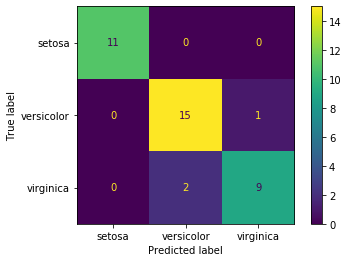

In [137]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_eval, y_eval)  
plt.show()  

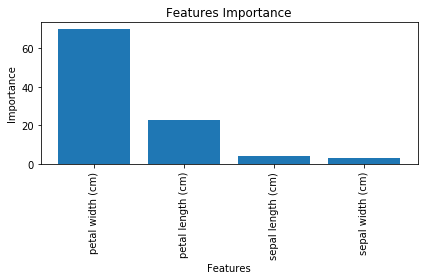

In [136]:
feat_imp_index = report_dict['feature_importance'].keys()
feat_imp_vals = report_dict['feature_importance'].values()

plt.title('Features Importance')
plt.bar(feat_imp_index, feat_imp_vals)
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()